<a href="https://colab.research.google.com/github/julexii/deploy/blob/main/Analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Montaje de Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importación de Bibliotecas
Se importan las bibliotecas necesarias: pandas, seaborn, numpy y matplotlib.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Se carga un archivo CSV desde Google Drive.

In [ ]:
data = pd.read_csv("drive/MyDrive/Colab Notebooks/DatasetDepurada.csv")

**Inspección Inicial de los Datos.** Se revisan las primeras y últimas filas del DataFrame, así como su información general.

In [ ]:
data.head()

,No.,Sexo,Pelaje,F.N.,Origen,numero_madre,numero_padre
0,1,MACHO,NO IDENTIFICADOS,01-01-1933,PER,0,0
1,2,MACHO,NO IDENTIFICADOS,01-01-1933,PER,0,0
2,3,HEMBRA,NO IDENTIFICADOS,01-01-1933,PER,0,0
3,4,HEMBRA,NO IDENTIFICADOS,01-01-1934,PER,0,0
4,5,HEMBRA,NO IDENTIFICADOS,01-01-1934,PER,0,0


In [ ]:
data.tail()

,No.,Sexo,Pelaje,F.N.,Origen,numero_madre,numero_padre
8421,8422,MACHO,CASTAÑO,11-02-2020,ECU,7769,4703
8422,8423,MACHO,ALAZAN,26-03-2020,ECU,5056,6299
8423,8424,HEMBRA,ALAZAN,01-04-2020,ECU,7194,7366
8424,8425,MACHO,ALAZAN,09-05-2020,ECU,7908,7499
8425,8426,MACHO,ALAZAN,11-05-2020,ECU,7647,7499


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8426 entries, 0 to 8425
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   No.           8426 non-null   int64 
 1   Sexo          8426 non-null   object
 2   Pelaje        8426 non-null   object
 3   F.N.          8426 non-null   object
 4   Origen        8426 non-null   object
 5   numero_madre  8426 non-null   int64 
 6   numero_padre  8426 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 460.9+ KB


**Distribución de Frecuencia del Pelaje**
Se calcula y muestra la frecuencia y el porcentaje de cada tipo de pelaje.

In [ ]:
# Calcular la frecuencia de cada pelaje
pelaje_counts = data['Pelaje'].value_counts()

# Calcular el porcentaje de cada pelaje
pelaje_percentage = (pelaje_counts / pelaje_counts.sum()) * 100

# Crear un DataFrame con pelaje, frecuencia y porcentaje
pelaje_df = pd.DataFrame({
    'Pelaje': pelaje_counts.index,
    'Frecuencia': pelaje_counts.values,
    'Porcentaje': pelaje_percentage.round(2).values  # Redondear a dos decimales
})

# Mostrar el DataFrame
from IPython.display import display
display(pelaje_df)

,Pelaje,Frecuencia,Porcentaje
0,ALAZAN,4363,51.78
1,CASTAÑO,1391,16.51
2,NO IDENTIFICADOS,1061,12.59
3,ZAINO,618,7.33
4,PALOMINO,418,4.96
5,TORDILLO,169,2.01
6,NEGRO,162,1.92
7,BAYO,124,1.47
8,MORO,43,0.51
9,ROSILLO,34,0.40


* Mostrar distribucion por sexo
-Mostrar distribucion por pelaje
-Mostrar distribucion por origen
-Mostrar distribucion de pelaje por sexo
-Mostrar distribucion de pelaje por origen
-Mostrar distribucion de sexo por origen

Distribución de variables univariadas

<Axes: ylabel='count'>

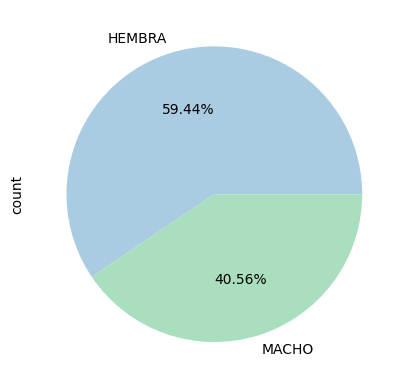

In [ ]:
data['Sexo'].value_counts().plot(kind = 'pie', autopct="%.2f%%", colors = ['#A9CCE3', '#A9DFBF'])

<Axes: xlabel='Pelaje'>

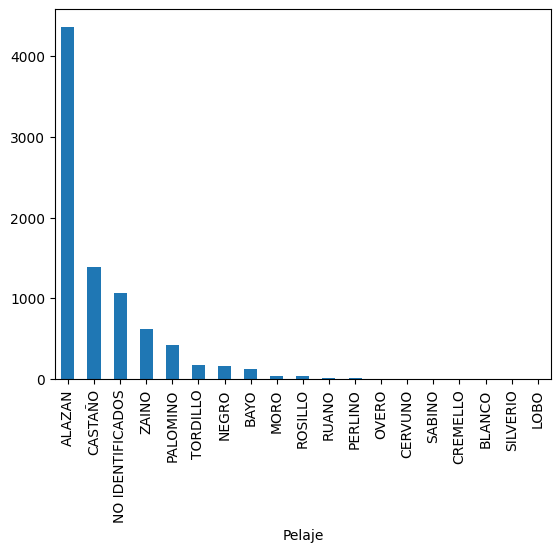

In [ ]:
data['Pelaje'].value_counts().plot(kind = 'bar')

**Agrupación de Pelajes Menores**
Se agrupan los pelajes menos frecuentes bajo la categoría "OTROS".

In [ ]:
#data["Pelaje"].replace({"TORDILLO": "OTROS"},inplace=True)
#data["Pelaje"].replace({"NEGRO": "OTROS"},inplace=True)
#data["Pelaje"].replace({"BAYO": "OTROS"},inplace=True)
data["Pelaje"].replace({"MORO": "OTROS"},inplace=True)
data["Pelaje"].replace({"ROSILLO": "OTROS"},inplace=True)
data["Pelaje"].replace({"RUANO": "OTROS"},inplace=True)
data["Pelaje"].replace({"PERLINO": "OTROS"},inplace=True)
data["Pelaje"].replace({"OVERO": "OTROS"},inplace=True)
data["Pelaje"].replace({"CERVUNO": "OTROS"},inplace=True)
data["Pelaje"].replace({"SABINO": "OTROS"},inplace=True)
data["Pelaje"].replace({"CREMELLO": "OTROS"},inplace=True)
data["Pelaje"].replace({"BLANCO": "OTROS"},inplace=True)
data["Pelaje"].replace({"SILVERIO": "OTROS"},inplace=True)
data["Pelaje"].replace({"LOBO": "OTROS"},inplace=True)

<Axes: ylabel='count'>

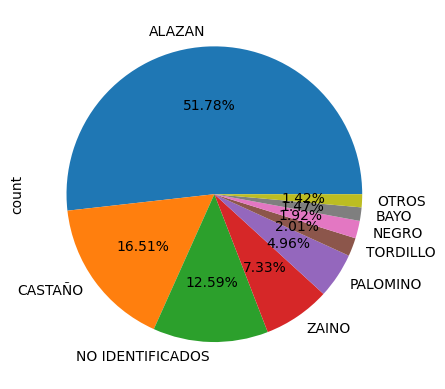

In [ ]:
data['Pelaje'].value_counts().plot(kind = 'pie', autopct="%.2f%%")

<Axes: xlabel='Origen'>

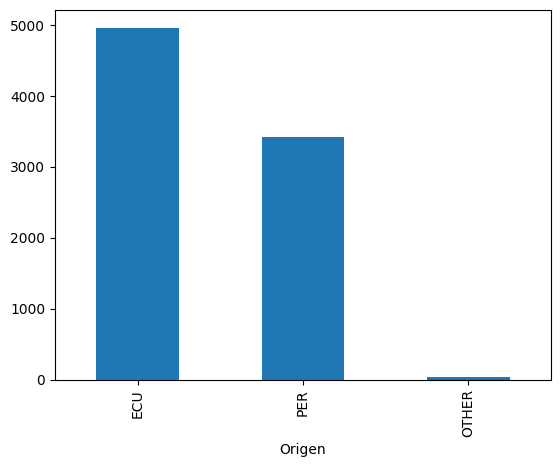

In [ ]:
data['Origen'].value_counts().plot(kind = 'bar')

In [ ]:
data["Origen"].replace({"PAN": "OTHER"},inplace=True)
data["Origen"].replace({"GUA": "OTHER"},inplace=True)
data["Origen"].replace({"USA": "OTHER"},inplace=True)
data["Origen"].replace({"HON": "OTHER"},inplace=True)

Distribución bivariados

In [ ]:
grupo_pelajes = data.groupby(['Sexo', 'Pelaje']).size().reset_index(name='frecuencia')
print(grupo_pelajes)

      Sexo            Pelaje  frecuencia
0   HEMBRA            ALAZAN        2508
1   HEMBRA              BAYO          70
2   HEMBRA           CASTAÑO         846
3   HEMBRA             NEGRO          98
4   HEMBRA  NO IDENTIFICADOS         679
5   HEMBRA             OTROS          78
6   HEMBRA          PALOMINO         240
7   HEMBRA          TORDILLO         129
8   HEMBRA             ZAINO         360
9    MACHO            ALAZAN        1855
10   MACHO              BAYO          54
11   MACHO           CASTAÑO         545
12   MACHO             NEGRO          64
13   MACHO  NO IDENTIFICADOS         382
14   MACHO             OTROS          42
15   MACHO          PALOMINO         178
16   MACHO          TORDILLO          40
17   MACHO             ZAINO         258


In [ ]:
tabla_pivot = grupo_pelajes.pivot(index='Sexo', columns='Pelaje', values='frecuencia').fillna(0)

# Mostrar el DataFrame resultante
from IPython.display import display
display(tabla_pivot)

Pelaje,ALAZAN,BAYO,CASTAÑO,NEGRO,NO IDENTIFICADOS,OTROS,PALOMINO,TORDILLO,ZAINO
Sexo,,,,,,,,,
HEMBRA,2508,70,846,98,679,78,240,129,360
MACHO,1855,54,545,64,382,42,178,40,258


In [ ]:
# Agrupar los datos por 'Sexo' y 'Pelaje' para obtener la frecuencia
grupo_pelajes = data.groupby(['Sexo', 'Pelaje']).size().reset_index(name='frecuencia')

# Crear la tabla pivot
tabla_pivot = grupo_pelajes.pivot(index='Sexo', columns='Pelaje', values='frecuencia').fillna(0)

# Sumar todos los valores para obtener el total
total_sum = tabla_pivot.values.sum()

# Convertir las frecuencias a porcentajes
tabla_pivot_percentage = (tabla_pivot / total_sum) * 100

# Redondear a dos decimales y agregar el signo de porcentaje
tabla_pivot_percentage = tabla_pivot_percentage.applymap(lambda x: f"{x:.2f}%")

# Mostrar el DataFrame resultante
from IPython.display import display
display(tabla_pivot_percentage)


Pelaje,ALAZAN,BAYO,CASTAÑO,NEGRO,NO IDENTIFICADOS,OTROS,PALOMINO,TORDILLO,ZAINO
Sexo,,,,,,,,,
HEMBRA,29.77%,0.83%,10.04%,1.16%,8.06%,0.93%,2.85%,1.53%,4.27%
MACHO,22.02%,0.64%,6.47%,0.76%,4.53%,0.50%,2.11%,0.47%,3.06%


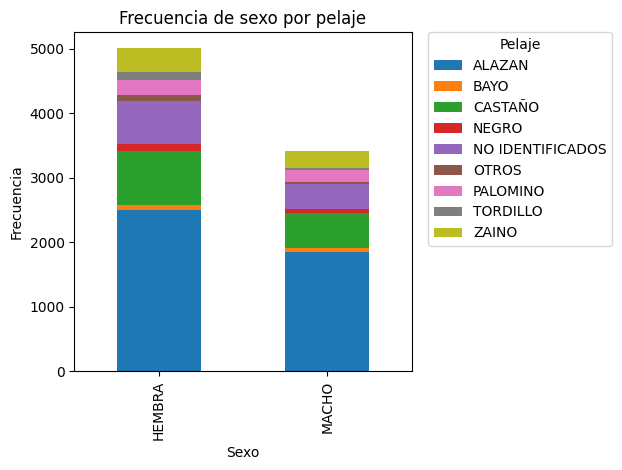

In [ ]:
tabla_pivot.plot(kind='bar', stacked=True)

# Configurar el título y las etiquetas
plt.title('Frecuencia de sexo por pelaje')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Crear una leyenda personalizada y ubicarla fuera del gráfico
plt.legend(title='Pelaje', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
# Agrupar los datos por 'Origen' y 'Pelaje' para obtener la frecuencia
grupo_origen = data.groupby(['Origen', 'Pelaje']).size().reset_index(name='frecuencia')
print(grupo_origen)

   Origen            Pelaje  frecuencia
0     ECU            ALAZAN        3015
1     ECU              BAYO          97
2     ECU           CASTAÑO         946
3     ECU             NEGRO          87
4     ECU  NO IDENTIFICADOS           1
5     ECU             OTROS          48
6     ECU          PALOMINO         318
7     ECU          TORDILLO          57
8     ECU             ZAINO         396
9   OTHER            ALAZAN           4
10  OTHER           CASTAÑO           3
11  OTHER  NO IDENTIFICADOS          28
12  OTHER             OTROS           1
13  OTHER          PALOMINO           1
14  OTHER             ZAINO           1
15    PER            ALAZAN        1344
16    PER              BAYO          27
17    PER           CASTAÑO         442
18    PER             NEGRO          75
19    PER  NO IDENTIFICADOS        1032
20    PER             OTROS          71
21    PER          PALOMINO          99
22    PER          TORDILLO         112
23    PER             ZAINO         221


In [ ]:
# Mostrar el DataFrame resultante
tabla_pivot_origen = grupo_origen.pivot(index='Origen', columns='Pelaje', values='frecuencia').fillna(0)
from IPython.display import display
display(tabla_pivot_origen)

Pelaje,ALAZAN,BAYO,CASTAÑO,NEGRO,NO IDENTIFICADOS,OTROS,PALOMINO,TORDILLO,ZAINO
Sexo,,,,,,,,,
HEMBRA,2508,70,846,98,679,78,240,129,360
MACHO,1855,54,545,64,382,42,178,40,258


In [ ]:
# Sumar todos los valores para obtener el total
total_sum_origen = tabla_pivot_origen.values.sum()

# Convertir las frecuencias a porcentajes
tabla_pivot_origen_percentage = (tabla_pivot_origen / total_sum_origen) * 100

# Redondear a dos decimales y agregar el signo de porcentaje
tabla_pivot_origen_percentage = tabla_pivot_origen_percentage.applymap(lambda x: f"{x:.2f}%")

# Mostrar el DataFrame resultante
from IPython.display import display
display(tabla_pivot_origen_percentage)


Pelaje,ALAZAN,BAYO,CASTAÑO,NEGRO,NO IDENTIFICADOS,OTROS,PALOMINO,TORDILLO,ZAINO
Origen,,,,,,,,,
ECU,35.78%,1.15%,11.23%,1.03%,0.01%,0.57%,3.77%,0.68%,4.70%
OTHER,0.05%,0.00%,0.04%,0.00%,0.33%,0.01%,0.01%,0.00%,0.01%
PER,15.95%,0.32%,5.25%,0.89%,12.25%,0.84%,1.17%,1.33%,2.62%


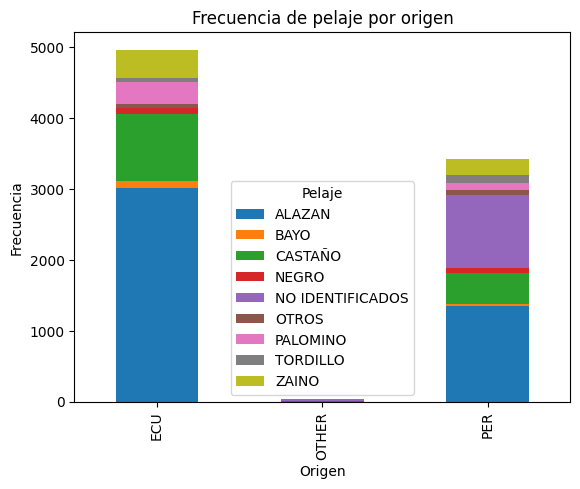

In [ ]:
tabla_pivot_origen.plot(kind='bar', stacked=True)
plt.title('Frecuencia de pelaje por origen')
plt.xlabel('Origen')
plt.ylabel('Frecuencia')
plt.legend(title='Pelaje')
plt.show()

In [ ]:
data["Origen"].value_counts()

Origen
ECU      4965
PER      3423
OTHER      38
Name: count, dtype: int64

In [ ]:
grupo_sexo = data.groupby(['Origen', 'Sexo']).size().reset_index(name='frecuencia')
print(grupo_sexo)

  Origen    Sexo  frecuencia
0    ECU  HEMBRA        2760
1    ECU   MACHO        2205
2  OTHER  HEMBRA          28
3  OTHER   MACHO          10
4    PER  HEMBRA        2220
5    PER   MACHO        1203


In [ ]:
tabla_pivot = grupo_sexo.pivot(index='Origen', columns='Sexo', values='frecuencia').fillna(0)
# Mostrar el DataFrame resultante
from IPython.display import display
display(tabla_pivot)

Sexo,HEMBRA,MACHO
Origen,,
ECU,2760,2205
OTHER,28,10
PER,2220,1203


In [ ]:
# Sumar todos los valores para obtener el total
total_sum_sexo = tabla_pivot.values.sum()

# Convertir las frecuencias a porcentajes
tabla_pivot_sexo_percentage = (tabla_pivot / total_sum_sexo) * 100

# Redondear a dos decimales y agregar el signo de porcentaje
tabla_pivot_sexo_percentage = tabla_pivot_sexo_percentage.applymap(lambda x: f"{x:.2f}%")

# Mostrar el DataFrame resultante
from IPython.display import display
display(tabla_pivot_sexo_percentage)


Sexo,HEMBRA,MACHO
Origen,,
ECU,32.76%,26.17%
OTHER,0.33%,0.12%
PER,26.35%,14.28%


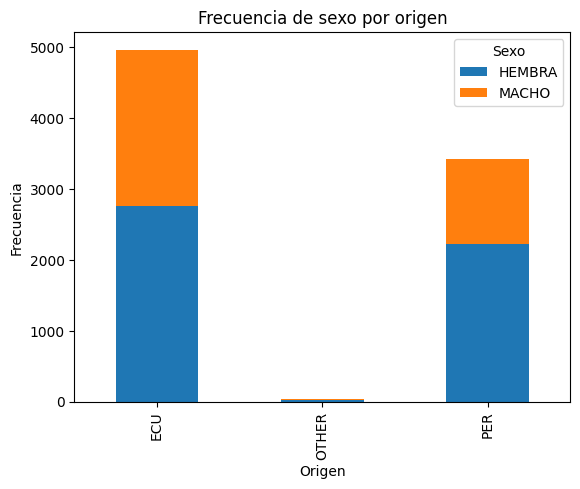

In [ ]:
tabla_pivot.plot(kind='bar', stacked=True)
plt.title('Frecuencia de sexo por origen')
plt.xlabel('Origen')
plt.ylabel('Frecuencia')
plt.legend(title='Sexo')
plt.show()

Cálculo de Distribución de Descendientes por Cruce de Pelajes desde l985 a 2020

In [ ]:


# Convertir la columna 'F.N.' a formato datetime
data['F.N.'] = pd.to_datetime(data['F.N.'], format='%d-%m-%Y', errors='coerce')

# Filtrar los datos entre 1985 y 2020
filtered_data = data[(data['F.N.'] >= '1985-01-01') & (data['F.N.'] <= '2020-12-31')]

# Filtrar los registros con ambos padres y pelaje identificado
both_parents_identified = filtered_data[
    (filtered_data['numero_madre'] != 0) &
    (filtered_data['numero_padre'] != 0) &
    (filtered_data['Pelaje'] != 'NO IDENTIFICADOS')
]

# Filtrar los registros donde no se identificaron padres
no_parents_identified = filtered_data[
    (filtered_data['numero_madre'] == 0) &
    (filtered_data['numero_padre'] == 0)
]

# Filtrar los registros con un padre identificado
one_parent_identified = filtered_data[
    ((filtered_data['numero_madre'] != 0) & (filtered_data['numero_padre'] == 0)) |
    ((filtered_data['numero_madre'] == 0) & (filtered_data['numero_padre'] != 0))
]

# Filtrar los registros con ambos padres identificados pero pelaje no identificado
both_parents_pelaje_no_identified = filtered_data[
    (filtered_data['numero_madre'] != 0) &
    (filtered_data['numero_padre'] != 0) &
    (filtered_data['Pelaje'] == 'NO IDENTIFICADOS')
]

# Obtener los conteos de cada categoría
counts = {
    'Ambos padres y pelaje identificado': both_parents_identified.shape[0],
    'No se identificaron padres': no_parents_identified.shape[0],
    'Un padre identificado': one_parent_identified.shape[0],
    'Ambos padres identificados pero pelaje NO IDENTIFICADOS': both_parents_pelaje_no_identified.shape[0]
}

from IPython.display import display
display(counts)

{'Ambos padres y pelaje identificado': 6477,
 'No se identificaron padres': 8,
 'Un padre identificado': 37,
 'Ambos padres identificados pero pelaje NO IDENTIFICADOS': 22}

In [ ]:
# Convertir la columna 'F.N.' a formato datetime
data['F.N.'] = pd.to_datetime(data['F.N.'], format='%d-%m-%Y', errors='coerce')

# Filtrar los datos entre 1985 y 2020
filtered_data = data[(data['F.N.'] >= '1985-01-01') & (data['F.N.'] <= '2020-12-31')]

# Filtrar los registros con ambos padres y pelaje identificado
filtered_data_identified = filtered_data[
    (filtered_data['numero_madre'] != 0) &
    (filtered_data['numero_padre'] != 0) &
    (filtered_data['Pelaje'] != 'NO IDENTIFICADOS')
]

# Crear diccionarios para mapear los pelajes de los padres
mother_pelaje = data.set_index('No.')['Pelaje'].to_dict()
father_pelaje = data.set_index('No.')['Pelaje'].to_dict()

# Añadir columnas para los pelajes de los padres
filtered_data_identified['Pelaje_Madre'] = filtered_data_identified['numero_madre'].map(mother_pelaje)
filtered_data_identified['Pelaje_Padre'] = filtered_data_identified['numero_padre'].map(father_pelaje)

# Filtrar los registros donde los pelajes de los padres no sean 'NO IDENTIFICADOS'
filtered_data_final = filtered_data_identified[
    (filtered_data_identified['Pelaje_Madre'] != 'NO IDENTIFICADOS') &
    (filtered_data_identified['Pelaje_Padre'] != 'NO IDENTIFICADOS')
]

# Realizar el análisis de cruce por pelaje
crosstab_combinations = pd.crosstab(
    index=[filtered_data_final['Pelaje_Madre'], filtered_data_final['Pelaje_Padre']],
    columns=filtered_data_final['Pelaje'],
    rownames=['Madre', 'Padre'],
    colnames=['FENOTIPO']
)

# Calcular la descendencia total y las probabilidades
total_offspring = crosstab_combinations.sum(axis=1)
probabilities = crosstab_combinations.div(total_offspring, axis=0)

# Redondear las probabilidades a dos decimales
probabilities = probabilities.round(2)

# Crear un DataFrame para almacenar los resultados
result_df = crosstab_combinations.copy()
result_df['Total_Descendencia'] = total_offspring
for col in probabilities.columns:
    result_df[f'Prob_{col}'] = probabilities[col]

# Mostrar la tabla de resultados
from IPython.display import display
display(result_df)


<ipython-input-109-41bde146c506>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_identified['Pelaje_Madre'] = filtered_data_identified['numero_madre'].map(mother_pelaje)
<ipython-input-109-41bde146c506>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_identified['Pelaje_Padre'] = filtered_data_identified['numero_padre'].map(father_pelaje)


FENOTIPO         ALAZAN  BAYO  BLANCO  CASTAÑO  CERVUNO  MORO  NEGRO  OVERO  \
Madre  Padre                                                                  
ALAZAN ALAZAN      2318     3       0       54        0     0      2      1   
       BAYO          20    17       0        7        0     0      0      0   
       CASTAÑO      293     1       0      225        0     0      8      0   
       MORO           0     0       0        2        0     0      0      0   
       NEGRO         11     0       0       20        0     0      4      0   
...                 ...   ...     ...      ...      ...   ...    ...    ...   
ZAINO  NEGRO          0     0       0        4        0     1      6      0   
       PALOMINO      10     6       0        4        0     0      0      0   
       ROSILLO        1     0       0        0        0     0      1      0   
       TORDILLO       1     0       0        0        0     0      0      0   
       ZAINO          3     1       0        8        0     0      9      0   

FENOTIPO         PALOMINO  ROSILLO  ...  Prob_CERVUNO  Prob_MORO  Prob_NEGRO  \
Madre  Padre                        ...                                        
ALAZAN ALAZAN          23        0  ...           0.0       0.00        0.00   
       BAYO            12        0  ...           0.0       0.00        0.00   
       CASTAÑO          2        1  ...           0.0       0.00        0.01   
       MORO             0        0  ...           0.0       0.00        0.00   
       NEGRO            0        0  ...           0.0       0.00        0.10   
...                   ...      ...  ...           ...        ...         ...   
ZAINO  NEGRO            0        0  ...           0.0       0.06        0.35   
       PALOMINO         7        0  ...           0.0       0.00        0.00   
       ROSILLO          0        0  ...           0.0       0.00        0.25   
       TORDILLO         0        0  ...           0.0       0.00        0.00   
       ZAINO            0        0  ...           0.0       0.00        0.20   

FENOTIPO         Prob_OVERO  Prob_PALOMINO  Prob_ROSILLO  Prob_RUANO  \
Madre  Padre                                                           
ALAZAN ALAZAN           0.0           0.01           0.0         0.0   
       BAYO             0.0           0.20           0.0         0.0   
       CASTAÑO          0.0           0.00           0.0         0.0   
       MORO             0.0           0.00           0.0         0.0   
       NEGRO            0.0           0.00           0.0         0.0   
...                     ...            ...           ...         ...   
ZAINO  NEGRO            0.0           0.00           0.0         0.0   
       PALOMINO         0.0           0.23           0.0         0.0   
       ROSILLO          0.0           0.00           0.0         0.0   
       TORDILLO         0.0           0.00           0.0         0.0   
       ZAINO            0.0           0.00           0.0         0.0   

FENOTIPO         Prob_SILVERIO  Prob_TORDILLO  Prob_ZAINO  
Madre  Padre                                               
ALAZAN ALAZAN              0.0           0.00        0.01  
       BAYO                0.0           0.00        0.05  
       CASTAÑO             0.0           0.00        0.06  
       MORO                0.0           0.00        0.00  
       NEGRO               0.0           0.00        0.15  
...                        ...            ...         ...  
ZAINO  NEGRO               0.0           0.00        0.35  
       PALOMINO            0.0           0.00        0.13  
       ROSILLO             0.0           0.00        0.50  
       TORDILLO            0.0           0.00        0.75  
       ZAINO               0.0           0.07        0.47  

[75 rows x 29 columns]

In [ ]:
# Filtrar las combinaciones con un total de descendencia de 100 o más
result_df_filtered = result_df[result_df['Total_Descendencia'] >= 100]

# Mostrar la tabla de resultados filtrada
from IPython.display import display
display(result_df_filtered)

FENOTIPO           ALAZAN  BAYO  BLANCO  CASTAÑO  CERVUNO  MORO  NEGRO  OVERO  \
Madre    Padre                                                                  
ALAZAN   ALAZAN      2318     3       0       54        0     0      2      1   
         CASTAÑO      293     1       0      225        0     0      8      0   
         PALOMINO     148     3       0        4        0     0      0      0   
         ZAINO         80     0       0       86        0     0      6      0   
CASTAÑO  ALAZAN       319     0       0      272        0     0     11      0   
         CASTAÑO       49     0       1      123        0     0      1      0   
PALOMINO ALAZAN       131     1       0        1        0     0      0      0   
ZAINO    ALAZAN       164     2       0      103        0     0      7      0   
         CASTAÑO       16     2       0       50        0     1      6      0   

FENOTIPO           PALOMINO  ROSILLO  ...  Prob_CERVUNO  Prob_MORO  \
Madre    Padre                        ...                            
ALAZAN   ALAZAN          23        0  ...           0.0       0.00   
         CASTAÑO          2        1  ...           0.0       0.00   
         PALOMINO       154        0  ...           0.0       0.00   
         ZAINO            2        0  ...           0.0       0.00   
CASTAÑO  ALAZAN           2        0  ...           0.0       0.00   
         CASTAÑO          1        0  ...           0.0       0.00   
PALOMINO ALAZAN         109        1  ...           0.0       0.00   
ZAINO    ALAZAN           2        0  ...           0.0       0.00   
         CASTAÑO          1        0  ...           0.0       0.01   

FENOTIPO           Prob_NEGRO  Prob_OVERO  Prob_PALOMINO  Prob_ROSILLO  \
Madre    Padre                                                           
ALAZAN   ALAZAN          0.00         0.0           0.01           0.0   
         CASTAÑO         0.01         0.0           0.00           0.0   
         PALOMINO        0.00         0.0           0.50           0.0   
         ZAINO           0.03         0.0           0.01           0.0   
CASTAÑO  ALAZAN          0.02         0.0           0.00           0.0   
         CASTAÑO         0.00         0.0           0.00           0.0   
PALOMINO ALAZAN          0.00         0.0           0.44           0.0   
ZAINO    ALAZAN          0.02         0.0           0.01           0.0   
         CASTAÑO         0.05         0.0           0.01           0.0   

FENOTIPO           Prob_RUANO  Prob_SILVERIO  Prob_TORDILLO  Prob_ZAINO  
Madre    Padre                                                           
ALAZAN   ALAZAN           0.0            0.0           0.00        0.01  
         CASTAÑO          0.0            0.0           0.00        0.06  
         PALOMINO         0.0            0.0           0.00        0.00  
         ZAINO            0.0            0.0           0.00        0.24  
CASTAÑO  ALAZAN           0.0            0.0           0.00        0.10  
         CASTAÑO          0.0            0.0           0.00        0.14  
PALOMINO ALAZAN           0.0            0.0           0.00        0.01  
ZAINO    ALAZAN           0.0            0.0           0.01        0.23  
         CASTAÑO          0.0            0.0           0.00        0.32  

[9 rows x 29 columns]

In [ ]:
# Unify the data by combining reciprocal pairs
unified_result = result_df_filtered.copy()

# Define a function to create sorted pairs to identify reciprocal combinations
def sorted_pair(mother, father):
    return tuple(sorted([mother, father]))

# Create a new index with sorted pairs
unified_result.index = unified_result.index.map(lambda x: sorted_pair(x[0], x[1]))

# Group by the new index and sum the values to combine reciprocal pairs
unified_result = unified_result.groupby(unified_result.index).sum()

# Remove the existing probability columns to avoid duplication
probability_columns = [col for col in unified_result.columns if col.startswith('Prob_')]
unified_result = unified_result.drop(columns=probability_columns)

# Añadir de nuevo las columnas de madre y padre basándose en el nuevo índice
unified_result['Madre'] = [pair[0] for pair in unified_result.index]
unified_result['Padre'] = [pair[1] for pair in unified_result.index]

# Reordenar las columnas para mantener la estructura original y omitir las probabilidades
columns_order = ['Madre', 'Padre'] + [col for col in result_df_filtered.columns if not col.startswith('Prob_') and col not in ['Madre', 'Padre']]
unified_result = unified_result[columns_order]

# Reset index to remove the default index column
unified_result.reset_index(drop=True, inplace=True)

from IPython.display import display
display(unified_result)


FENOTIPO,Madre,Padre,ALAZAN,BAYO,BLANCO,CASTAÑO,CERVUNO,MORO,NEGRO,OVERO,PALOMINO,ROSILLO,RUANO,SILVERIO,TORDILLO,ZAINO,Total_Descendencia
0,ALAZAN,ALAZAN,2318,3,0,54,0,0,2,1,23,0,0,1,1,15,2418
1,ALAZAN,CASTAÑO,612,1,0,497,0,0,19,0,4,1,1,0,2,102,1239
2,ALAZAN,PALOMINO,279,4,0,5,0,0,0,0,263,1,0,1,1,2,556
3,ALAZAN,ZAINO,244,2,0,189,0,0,13,0,4,0,0,0,2,137,591
4,CASTAÑO,CASTAÑO,49,0,1,123,0,0,1,0,1,0,0,0,0,29,204
5,CASTAÑO,ZAINO,16,2,0,50,0,1,6,0,1,0,0,0,0,36,112


In [ ]:
# Recalcular las probabilidades después de combinar los datos, solo para columnas numéricas
numeric_columns = unified_result.select_dtypes(include='number').columns
total_offspring_unified = unified_result['Total_Descendencia']  # Sumar la descendencia total
probabilities_unified = unified_result[numeric_columns].div(total_offspring_unified, axis=0)  # Calcular las probabilidades

# Redondear las probabilidades a dos decimales
probabilities_unified = probabilities_unified.round(2)

# Crear un DataFrame para almacenar los resultados unificados con las probabilidades recalculadas
unified_result_final = unified_result[['Madre', 'Padre', 'Total_Descendencia']].copy()
for col in probabilities_unified.columns:
    unified_result_final[f'Prob_{col}'] = probabilities_unified[col]  # Añadir las columnas de probabilidad al DataFrame final

# Mostrar el resultado unificado con las probabilidades recalculadas
display(unified_result_final)


FENOTIPO,Madre,Padre,Total_Descendencia,Prob_ALAZAN,Prob_BAYO,Prob_BLANCO,Prob_CASTAÑO,Prob_CERVUNO,Prob_MORO,Prob_NEGRO,Prob_OVERO,Prob_PALOMINO,Prob_ROSILLO,Prob_RUANO,Prob_SILVERIO,Prob_TORDILLO,Prob_ZAINO,Prob_Total_Descendencia
0,ALAZAN,ALAZAN,2418,0.96,0.00,0.0,0.02,0.0,0.00,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.01,1.0
1,ALAZAN,CASTAÑO,1239,0.49,0.00,0.0,0.40,0.0,0.00,0.02,0.0,0.00,0.0,0.0,0.0,0.0,0.08,1.0
2,ALAZAN,PALOMINO,556,0.50,0.01,0.0,0.01,0.0,0.00,0.00,0.0,0.47,0.0,0.0,0.0,0.0,0.00,1.0
3,ALAZAN,ZAINO,591,0.41,0.00,0.0,0.32,0.0,0.00,0.02,0.0,0.01,0.0,0.0,0.0,0.0,0.23,1.0
4,CASTAÑO,CASTAÑO,204,0.24,0.00,0.0,0.60,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.14,1.0
5,CASTAÑO,ZAINO,112,0.14,0.02,0.0,0.45,0.0,0.01,0.05,0.0,0.01,0.0,0.0,0.0,0.0,0.32,1.0


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos de la tabla proporcionada en formato legible
data = {
    'Madre': ['ALAZAN', 'ALAZAN', 'ALAZAN', 'ALAZAN', 'CASTAÑO', 'CASTAÑO'],
    'Padre': ['ALAZAN', 'CASTAÑO', 'PALOMINO', 'ZAINO', 'CASTAÑO', 'ZAINO'],
    'Total_Descendencia': [2418, 1239, 556, 591, 204, 112],
    'Prob_ALAZAN': [96.00, 49.50, 50.50, 40.00, 24.00, 14.00],
    'Prob_BAYO': [0.00, 0.00, 0.50, 0.50, 0.00, 2.00],
    'Prob_CASTAÑO': [2.00, 40.50, 0.50, 33.00, 60.00, 45.00],
    'Prob_NEGRO': [0.00, 1.50, 0.00, 2.50, 0.00, 5.00],
    'Prob_PALOMINO': [1.00, 0.00, 47.00, 1.00, 0.00, 1.00],
    'Prob_ZAINO': [1.00, 8.00, 0.50, 23.50, 14.00, 32.00]
}

# Crear el DataFrame
df = pd.DataFrame(data)

In [ ]:
# Función para crear gráficos de pastel sin ajustar a 100%
def create_pie_chart_from_table(row, title):
    # Filtrar probabilidades mayores al 2%
    probabilities_filtered = {col: row[col] for col in row.index if col.startswith('Prob_') and row[col] >= 2}
    labels = [label.replace('Prob_', '') for label in probabilities_filtered.keys()]
    sizes = list(probabilities_filtered.values())

    # Crear gráfico de pastel
    plt.figure(figsize=(10, 7))
    plt.pie(sizes, labels=labels, autopct=lambda p: f'{p * sum(sizes) / 100 :.1f}%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Asegura que el gráfico de pastel sea un círculo
    plt.show()


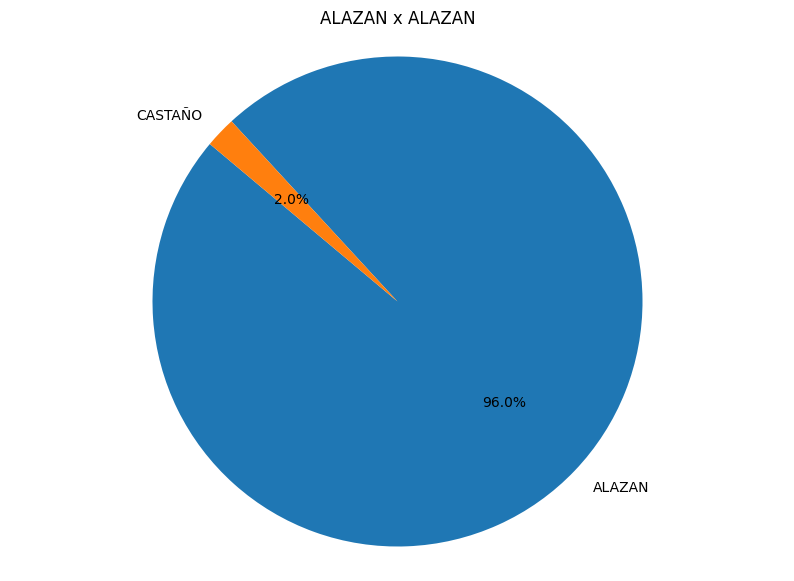

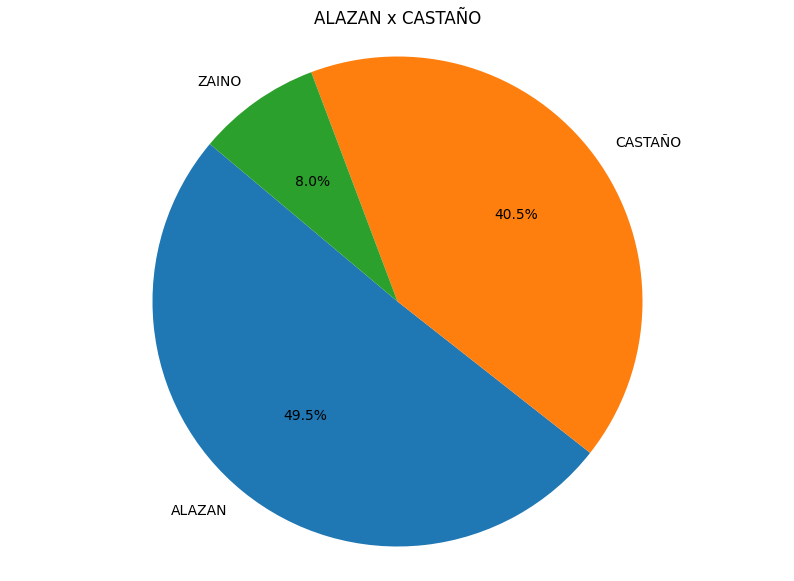

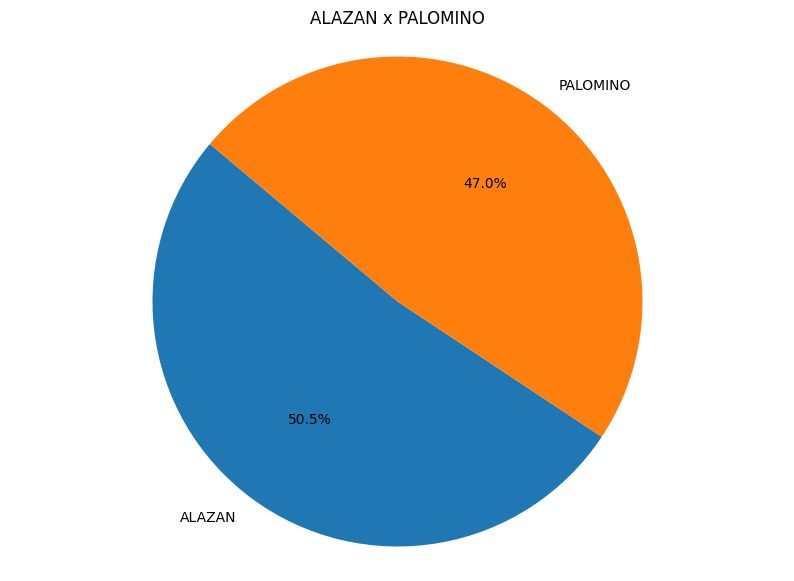

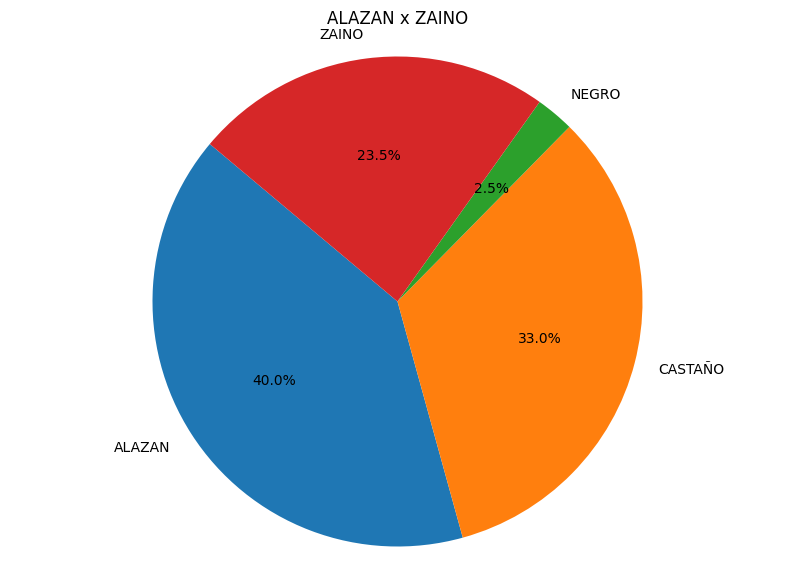

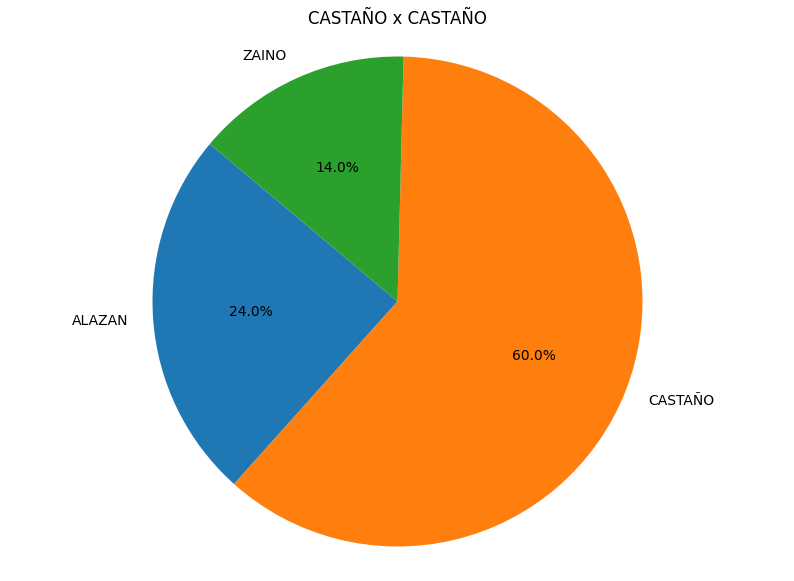

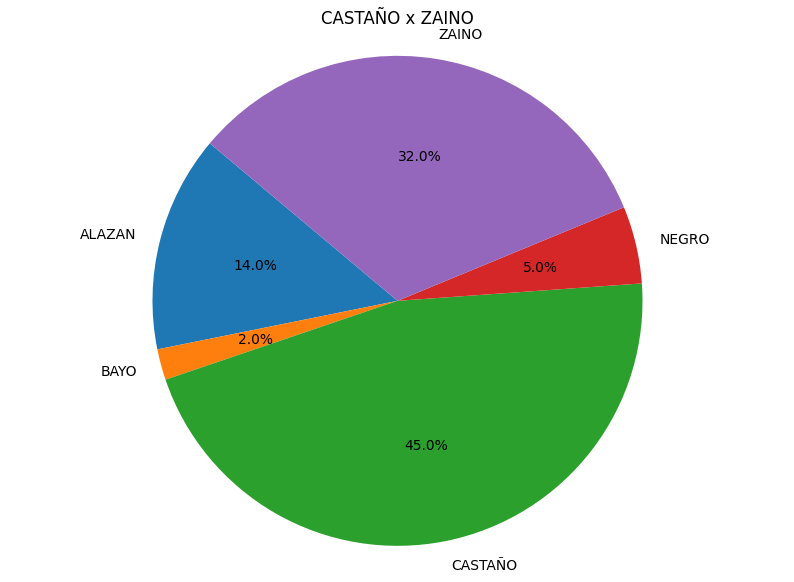

In [ ]:
# Generar los gráficos
for _, row in df.iterrows():
    create_pie_chart_from_table(row, f"{row['Madre']} x {row['Padre']}")

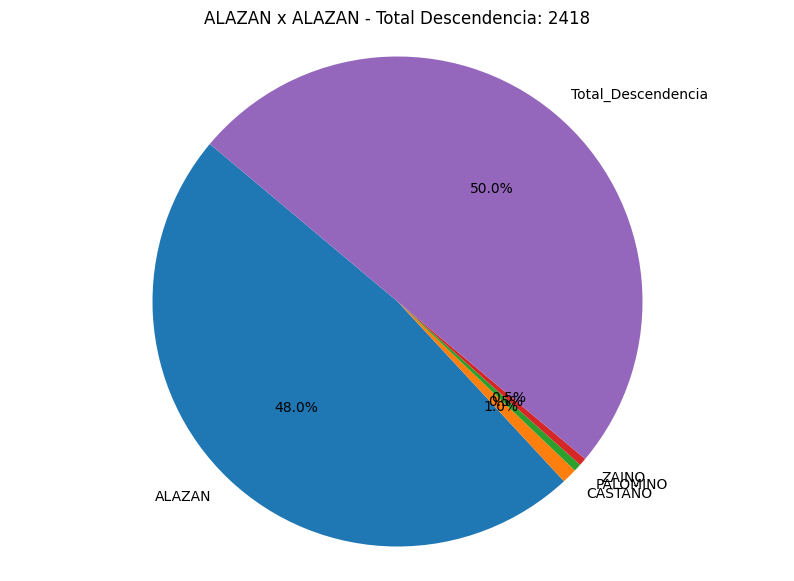

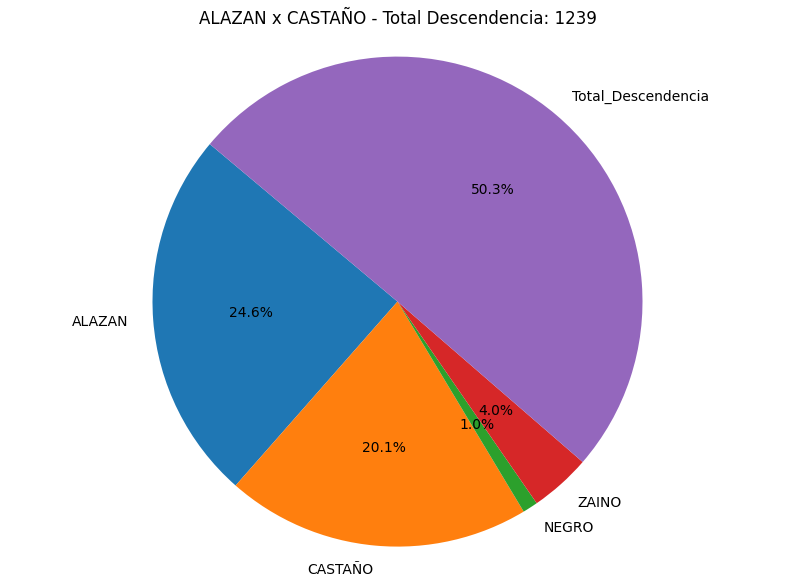

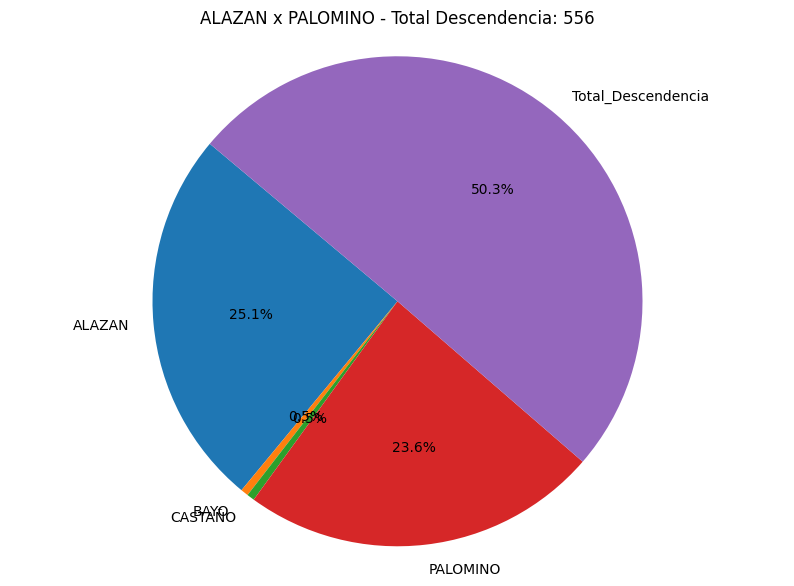

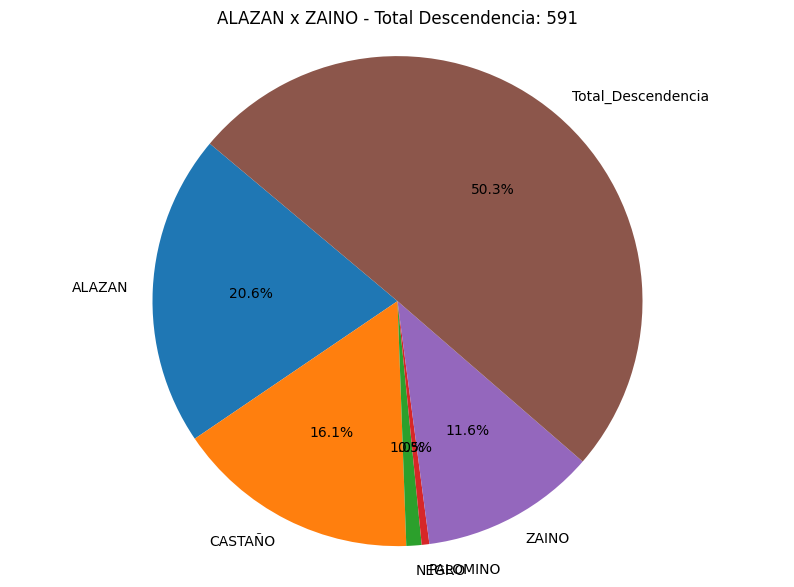

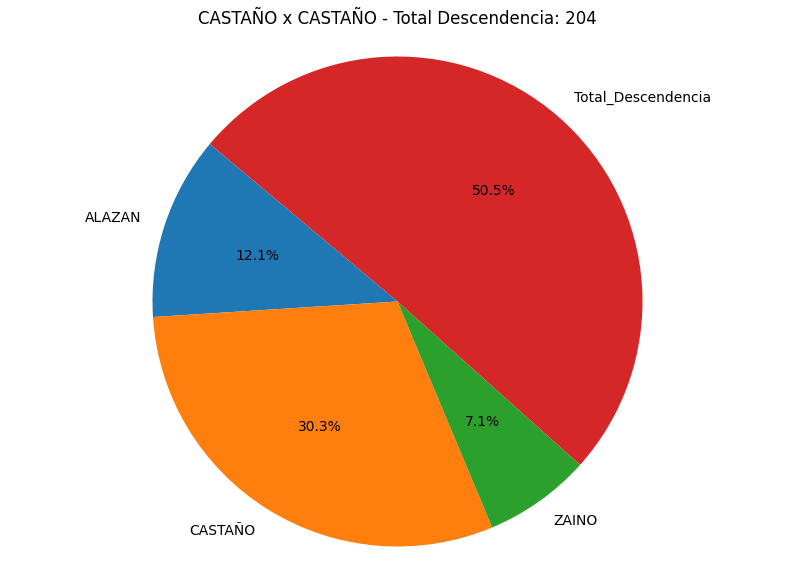

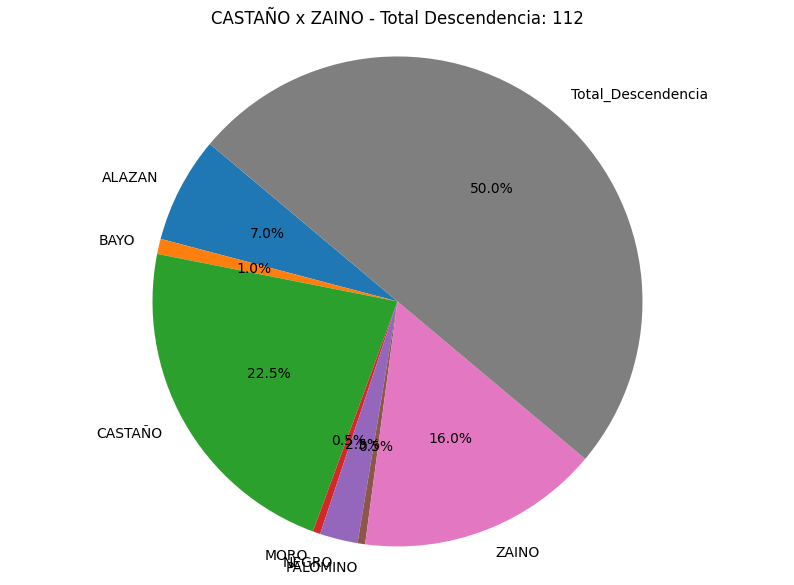

In [ ]:
# Función para crear gráficos de pastel sin ajustar a 100%
def create_pie_chart_from_table(row, title):
    # Filtrar probabilidades mayores al 2%
    probabilities_filtered = {col: row[col] for col in row.index if col.startswith('Prob_') and row[col] > 0}
    labels = [label.replace('Prob_', '') for label in probabilities_filtered.keys()]
    sizes = list(probabilities_filtered.values())

    # Crear gráfico de pastel
    plt.figure(figsize=(10, 7))
    plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Asegura que el gráfico de pastel sea un círculo
    plt.show()

# Generar los gráficos
for _, row in unified_result_final.iterrows():
    title = f"{row['Madre']} x {row['Padre']} - Total Descendencia: {row['Total_Descendencia']}"
    create_pie_chart_from_table(row, title)